(512, 512)


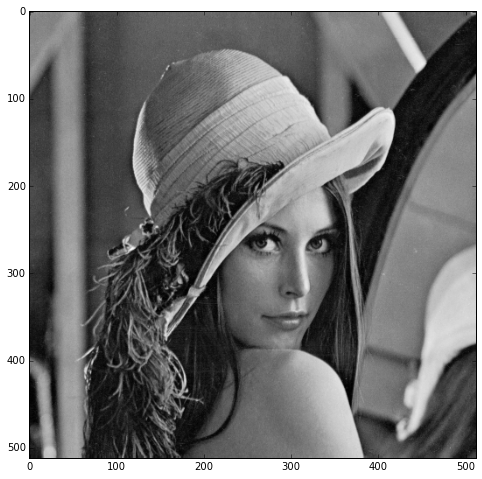

In [1]:
import tomopy
import matplotlib.pyplot as plt
%matplotlib inline
lena = tomopy.lena().reshape((512,512))
baboon = tomopy.baboon().reshape((512,512))
barbara = tomopy.barbara().reshape((512,512))
cameraman = tomopy.cameraman().reshape((512,512))
checkerboard = tomopy.checkerboard().reshape((512,512))
peppers = tomopy.peppers().reshape((512,512))
print lena.shape
plt.figure(figsize = (8,8))
plt.imshow(lena, cmap = 'gray', interpolation = None)
plt.show()

In [27]:
print lena.max(), baboon.max(),peppers.max()

248.0 230.0 229.0


In [2]:
import numpy as np
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))



(1280, 32, 32)
1280 32 32
255.0


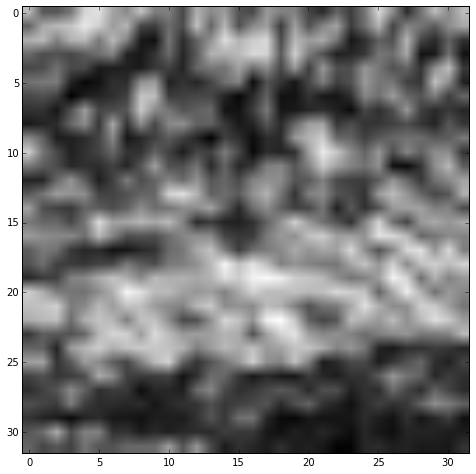

In [3]:
Y_train =np.zeros((1280,32,32))
Y_train[0:256] =blockshaped(baboon, 32, 32) 
Y_train[256:512] =blockshaped(barbara, 32, 32) 
Y_train[512:768] =blockshaped(cameraman, 32, 32) 
Y_train[768:1024] =blockshaped(checkerboard, 32, 32) 
Y_train[1024:1280] = blockshaped(lena, 32, 32)
print Y_train.shape
n_img, y_img, x_img = Y_train.shape
print n_img, y_img, x_img
print Y_train.max()
plt.figure(figsize = (8,8))
plt.imshow(Y_train[10], cmap = 'gray', interpolation = None)
plt.show()

In [4]:
def nor_data(img):
    mean_tmp = np.mean(img)
    std_tmp = np.std(img)
    img = (img-mean_tmp)/std_tmp
    return img
Y_train = nor_data(Y_train)

In [5]:
def add_strip(img,dim): 

    if dim == 2:
        y_img, x_img = img.shape
        x_ind = range(x_img)
        y_range = range(y_img)
        val_strip = 0.1*img.max()
        for i in range(x_img):
            if np.random.random() > 0.8:
                #pix_strip = val_strip*np.random.rand(y_img,)
                pix_strip = val_strip
                img[:,i] = pix_strip
    else:
        n_img, y_img, x_img = img.shape
        x_ind = range(x_img)
        y_range = range(y_img)
        val_strip = 0.1*img.max()
        for i in range(n_img):
            for j in range(x_img):
                if np.random.random() > 0.8:
                    #pix_strip = val_strip*np.random.rand(y_img,)
                    pix_strip = val_strip
                    img[i,:,j] = pix_strip
    return img
    
            
    

(1280, 32, 32)


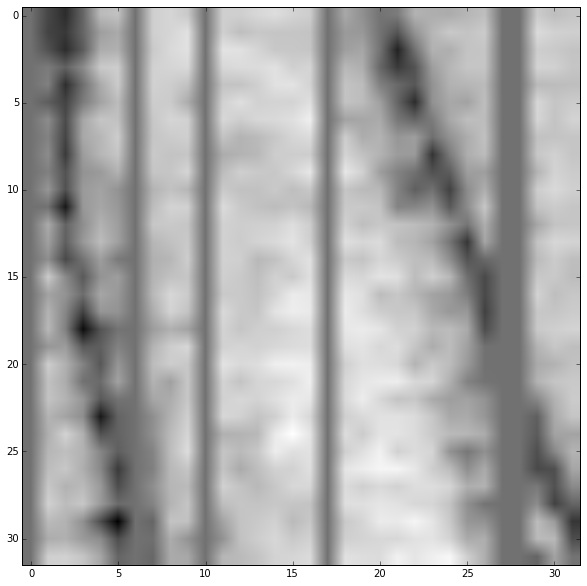

In [6]:
X_train = add_strip(Y_train,3)
print X_train.shape
plt.figure(figsize = (10,10))
plt.imshow(X_train[100], cmap = 'gray', interpolation = None)
plt.show()

In [8]:
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
#import keras models
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.core import Dense, Reshape, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils

batch_size = 50
nb_epoch = 50
dim_img = 32
nb_filters= 64
nb_conv = 3
X_train = np.reshape(X_train, (len(X_train),1,dim_img,dim_img))
Y_train = np.reshape(Y_train, (len(Y_train),1,dim_img,dim_img))

In [9]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
    border_mode='same',
    input_shape=(1, dim_img, dim_img)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv, border_mode='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense((dim_img/4)**2))
model.add(Reshape((1,dim_img/4,dim_img/4)))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(nb_filters*2,nb_conv,nb_conv,border_mode='same'))
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(1, 1, 1, border_mode='same'))



model.compile(loss='mean_squared_error',optimizer = 'Adam')
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch)

Epoch 1/50
1280/1280 [==============================] - 5s - loss: 0.5769     
Epoch 2/50
1280/1280 [==============================] - 4s - loss: 0.4105     
Epoch 3/50
1280/1280 [==============================] - 4s - loss: 0.3236     
Epoch 4/50
1280/1280 [==============================] - 4s - loss: 0.2503     
Epoch 5/50
1280/1280 [==============================] - 4s - loss: 0.2204     
Epoch 6/50
1280/1280 [==============================] - 4s - loss: 0.2128     
Epoch 7/50
1280/1280 [==============================] - 4s - loss: 0.1985     
Epoch 8/50
1280/1280 [==============================] - 4s - loss: 0.1932     
Epoch 9/50
1280/1280 [==============================] - 4s - loss: 0.1895     
Epoch 10/50
1280/1280 [==============================] - 4s - loss: 0.1862     
Epoch 11/50
1280/1280 [==============================] - 4s - loss: 0.1845     
Epoch 12/50
1280/1280 [==============================] - 4s - loss: 0.1794     
Epoch 13/50
1280/1280 [==========================

Predicting


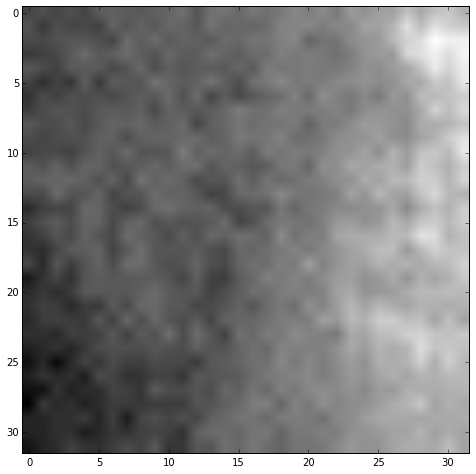

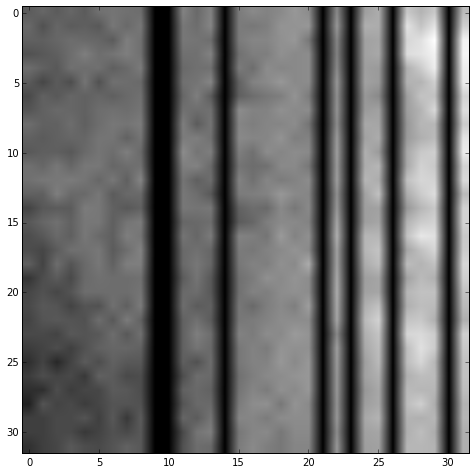

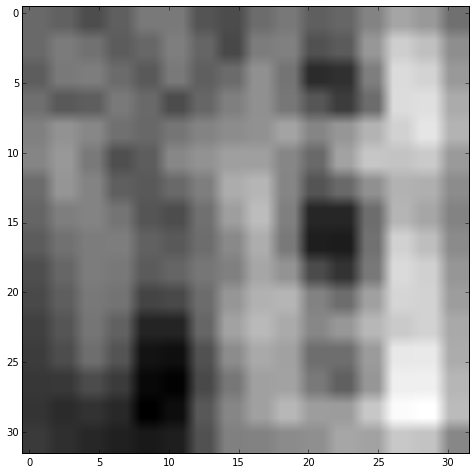

In [12]:
print('Predicting')
X_origin = blockshaped(peppers, 32, 32)
plt.figure(figsize = (8,8))
plt.imshow(X_origin[100], cmap = 'gray', interpolation = None)
plt.show()
X_origin = nor_data(X_origin)
x_test = add_strip(X_origin,3)

plt.figure(figsize = (8,8))
plt.imshow(x_test[100], cmap = 'gray', interpolation = None)
plt.show()
X_test = np.reshape(x_test, (len(x_test),1,dim_img,dim_img))
predicted_output = model.predict(X_test, batch_size=batch_size)
predicted_output = np.reshape(predicted_output, (len(predicted_output),dim_img,dim_img))

plt.figure(figsize = (8,8))
plt.imshow(predicted_output[100], cmap = 'gray', interpolation = None)
plt.show()

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

In [18]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

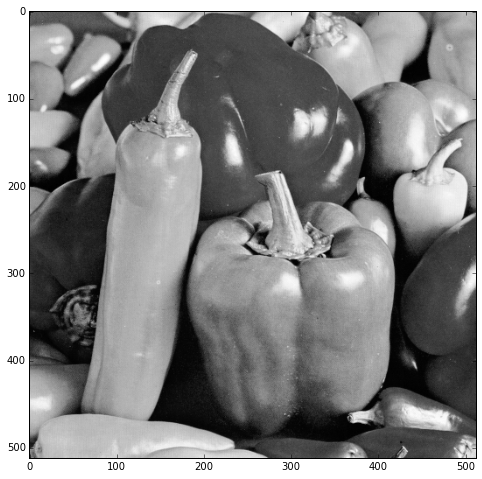

In [25]:
plt.figure(figsize = (8,8))
plt.imshow(peppers, cmap = 'gray', interpolation = None)
plt.show()

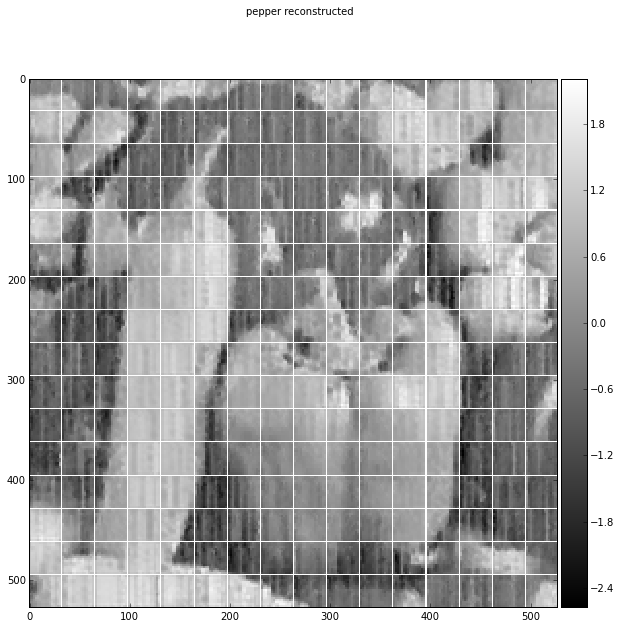

In [26]:
import pylab as pl
pl.figure(figsize=(10, 10))
pl.suptitle('pepper reconstructed')
nice_imshow(pl.gca(), make_mosaic(predicted_output, 16, 16), cmap='gray')

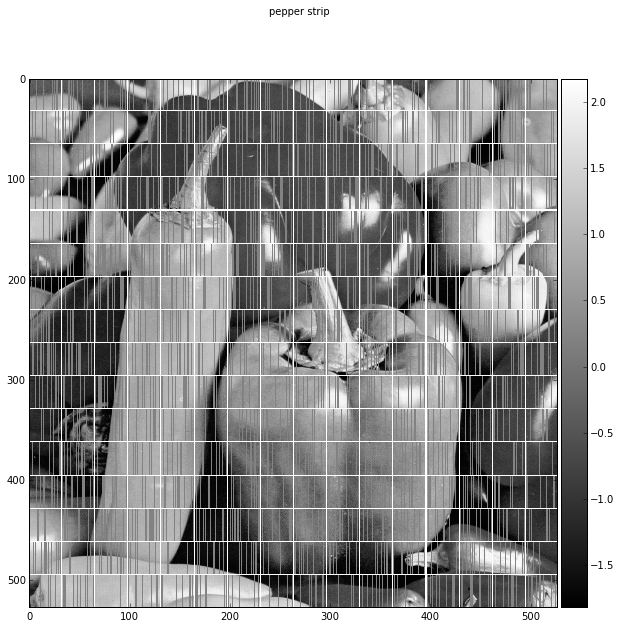

In [27]:
pl.figure(figsize=(10, 10))
pl.suptitle('pepper strip')
nice_imshow(pl.gca(), make_mosaic(x_test, 16, 16), cmap='gray')